In [1]:
%pip install weaviate-client

Note: you may need to restart the kernel to use updated packages.


1. Start the Weaviate instance: `docker compose up`
2. Run code below

In [2]:
import pickle, json, os, IPython, base64
import weaviate
import weaviate.classes as wvc
from weaviate.classes.config import Configure

In [3]:
#Connect to the locally launched instance of Weaviate

client = weaviate.connect_to_local()

print(f"Client created? {client.is_ready()}")

Client created? True


In [4]:
# client.collections?

In [5]:
#Make sure that we don't have a class already created

if client.collections.exists("ClipExample"):
    client.collections.delete("ClipExample")
    print("Deleted existing ClipExample collection")

Deleted existing ClipExample collection


In [6]:
#Create a class object that uses a multi2vec module
#A multi2vec module understands multiple types of data - there are 

from weaviate.classes.config import Property, DataType

client.collections.create(
    name="ClipExample",
    vectorizer_config=Configure.Vectorizer.multi2vec_clip(
        image_fields=["image"]
    ),
    properties=[
        Property(name="image", data_type=DataType.BLOB),
        Property(name="filename", data_type=DataType.TEXT)
    ]
)

print("Schema class created")

/home/elmunoz42/anaconda3/lib/python3.13/site-packages/weaviate/warnings.py:196: DeprecationWarning: Dep024: You are using the `vectorizer_config` argument in `collection.config.create()`, which is deprecated.
            Use the `vector_config` argument instead.
            
  warnings.warn(


Schema class created


In [7]:
#Add images to our created class

collection = client.collections.get("ClipExample")

# Filter for image files only
image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']
image_files = [f for f in os.listdir("Images/") if os.path.splitext(f)[1].lower() in image_extensions]

for img in image_files:
    try:
        with open(f"Images/{img}", "rb") as file:
            image_data = base64.b64encode(file.read()).decode('utf-8')
        
        collection.data.insert(
            properties={
                "image": image_data,
                "filename": img
            }
        )
        print(f"Added: {img}")
    except Exception as e:
        print(f"Error adding {img}: {e}")

print(f"\nTotal: Added {len(image_files)} images to the collection")

Added: 468337348_17991199886727268_8855810400139143053_n_309509958695957.jpg
Added: 468326167_17991212744727268_8282171994485586664_n_402087209438231.jpg
Added: 468310079_17991367991727268_8164388107061381962_n_505553369091614.jpg
Added: 465687838_17988540869727268_9044120823789552817_n_548020568178227.jpg
Added: 415883050_17950458371727268_8602561841129875324_n_337656102548009.jpg
Added: 444489694_17968139192727268_8989370855946106927_n_433606826286269.jpg
Added: 467644348_17990548967727268_5472297515569339925_n_560128693634081.jpg
Added: 415919628_17950458389727268_326870210472368573_n_337656105881342.jpg
Added: 463150246_17985925556727268_80671154156561427_n_532384823075135.jpg
Added: 467173125_17989569440727268_2631669431279082195_n_554236254223325.jpg
Added: 444885247_17968139171727268_7377334944199647937_n_433606822952936.jpg
Added: 468324327_17991368918727268_8417673100223931647_n_519713914342226.jpg
Added: 438093319_17966399474727268_8935427172587286481_n_423454203968198.jpg
Ad

In [8]:
#Lets search for images of "dogs"

query = "dogs"

collection = client.collections.get("ClipExample")

res = collection.query.near_text(
    query=query,
    limit=3
)

print(json.dumps([{"uuid": str(o.uuid), "properties": o.properties} for o in res.objects], indent=2))

[
  {
    "uuid": "e918126c-a76e-418a-bc1c-9711a7718d45",
    "properties": {
      "filename": "464273578_17986939703727268_8656003150953393382_n_538608539119430.jpg"
    }
  },
  {
    "uuid": "5581ab3a-34bb-45f5-90ec-8b05221eafb8",
    "properties": {
      "filename": "415883994_17950458341727268_290995921948884303_n_337656109214675.jpg"
    }
  },
  {
    "uuid": "0a643b75-dd5f-4b01-b9c4-3248f4b46c1b",
    "properties": {
      "filename": "468335233_17991365747727268_1764583962884647032_n_478806638432954.jpg"
    }
  }
]


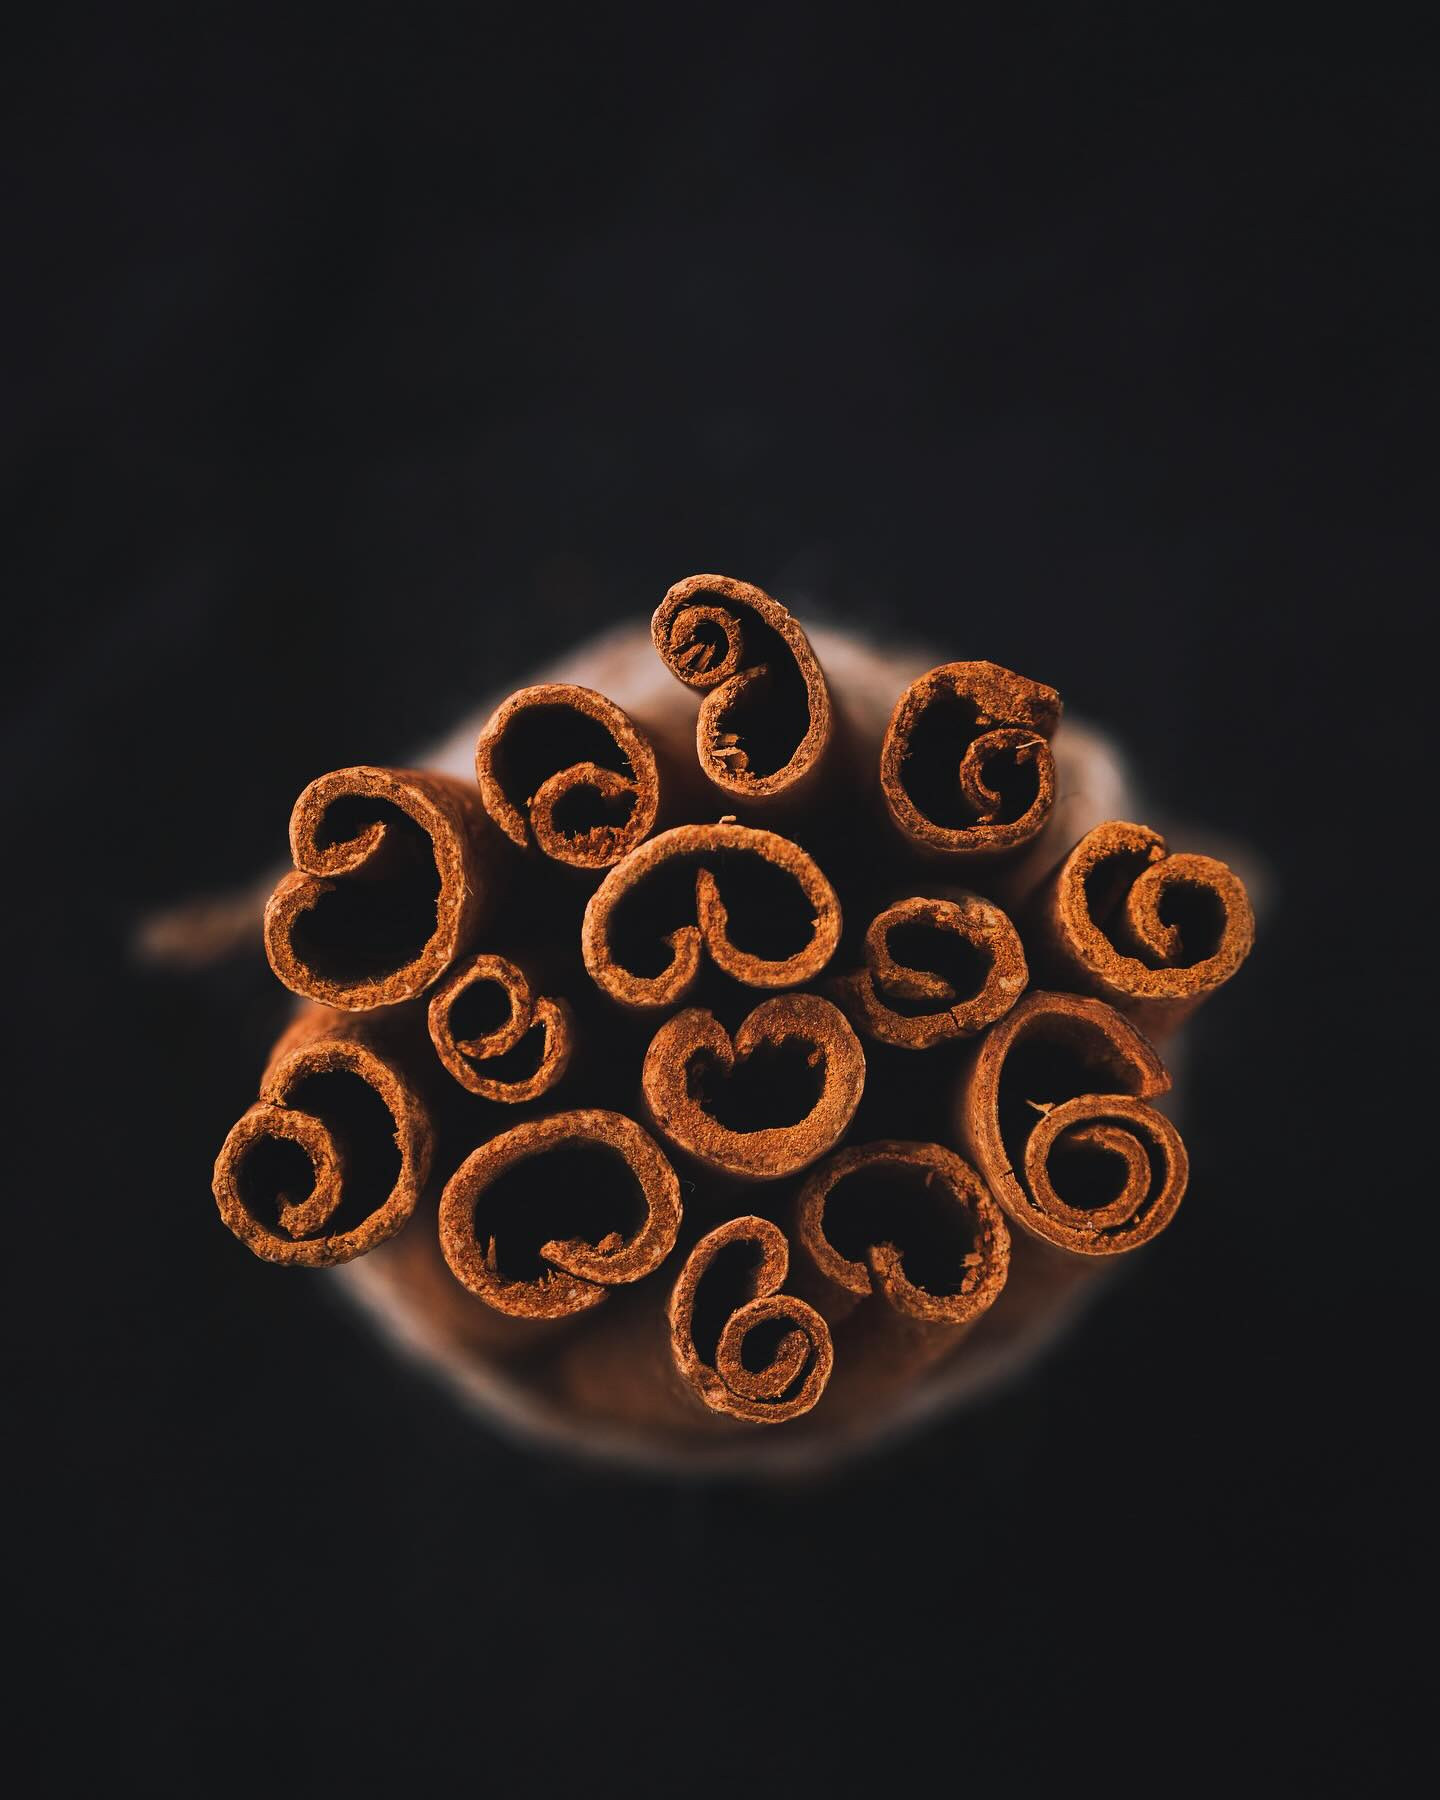

In [9]:
#Lets visualize the images that came back
IPython.display.Image(filename='Images/464273578_17986939703727268_8656003150953393382_n_538608539119430.jpg') 

In [10]:
#Lets search for images using a query image

collection = client.collections.get("ClipExample")

# Pick an image to use as the query
# query_image_path = "Images/n02102040_372.JPEG"
query_image_path = "TestImages/n01440764_20592.JPEG"

with open(query_image_path, "rb") as file:
    query_image = base64.b64encode(file.read()).decode('utf-8')

imres = collection.query.near_image(
    near_image=query_image,
    limit=3
)

print(json.dumps([{"uuid": str(o.uuid), "filename": o.properties.get("filename")} for o in imres.objects], indent=2))

[
  {
    "uuid": "6315347f-c505-49d0-a4a6-2e5b0f02df25",
    "filename": "441466275_17966399447727268_3303154914267625433_n_423454193968199.jpg"
  },
  {
    "uuid": "d2563e98-0911-497c-b0d9-e48b24e9a0b3",
    "filename": "444885247_17968139171727268_7377334944199647937_n_433606822952936.jpg"
  },
  {
    "uuid": "2ae490c2-1ee7-47a8-877d-8e23b5ba17b4",
    "filename": "438087267_17966399438727268_8823241483927263027_n_423454190634866.jpg"
  }
]


In [11]:
#Lets visualize the images that came back
IPython.display.Image(filename='Images/ILSVRC2012_val_00016582.JPEG') 

/home/elmunoz42/anaconda3/lib/python3.13/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
/home/elmunoz42/anaconda3/lib/python3.13/ast.py:602: DeprecationWarning: Constant.__init__ got an unexpected keyword argument 's'. Support for arbitrary keyword arguments is deprecated and will be removed in Python 3.15.
  return Constant(*args, **kwargs)
/home/elmunoz42/anaconda3/lib/python3.13/ast.py:602: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
/home/elmunoz42/anaconda3/lib/python3.13/ast.py:602: DeprecationWarning: Constant.__init__ missing 1 required positional argument: 'value'. This will become an error in Python 3.15.
  return Constant(*args, **kwargs)


FileNotFoundError: [Errno 2] No such file or directory: 'Images/ILSVRC2012_val_00016582.JPEG'

In [22]:
%pip install gradio

/home/elmunoz42/anaconda3/lib/python3.13/pty.py:95: DeprecationWarning: This process (pid=43558) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [12]:
import gradio as gr
from PIL import Image
import io

def search_images(query_text):
    """Search for images based on text query and return top 3 results"""
    collection = client.collections.get("ClipExample")
    
    res = collection.query.near_text(
        query=query_text,
        limit=3
    )
    
    # Get the filenames and decode images
    images = []
    for obj in res.objects:
        filename = obj.properties.get("filename")
        if filename:
            try:
                # Read the image file
                img_path = f"Images/{filename}"
                img = Image.open(img_path)
                images.append(img)
            except Exception as e:
                print(f"Error loading {filename}: {e}")
    
    # Pad with None if we have fewer than 3 results
    while len(images) < 3:
        images.append(None)
    
    return images[0], images[1], images[2]

In [13]:
# Create Gradio interface
with gr.Blocks() as demo:
    gr.Markdown("# Weaviate Image Search")
    gr.Markdown("Enter a text query to search for similar images")
    
    with gr.Row():
        query_input = gr.Textbox(
            label="Search Query", 
            placeholder="e.g., dogs, cats, cars, etc.",
            value="friends chilling..."
        )
    
    search_btn = gr.Button("Search", variant="primary")
    
    with gr.Row():
        img1 = gr.Image(label="Result 1", type="pil")
        img2 = gr.Image(label="Result 2", type="pil")
        img3 = gr.Image(label="Result 3", type="pil")
    
    search_btn.click(
        fn=search_images,
        inputs=query_input,
        outputs=[img1, img2, img3]
    )

demo.launch(share=False)

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


/home/elmunoz42/anaconda3/lib/python3.13/site-packages/gradio/routes.py:1350: DeprecationWarning: 'HTTP_422_UNPROCESSABLE_ENTITY' is deprecated. Use 'HTTP_422_UNPROCESSABLE_CONTENT' instead.
  return await queue_join_helper(body, request, username)
